In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data from CSV

In [2]:
df=pd.read_csv(r'.\movies.csv')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


Date exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


Data Cleaning


In [4]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [5]:
df.duplicated().sum()

431

Removing dups

In [6]:
df = df.drop_duplicates()

Removing useless and heavily missing Cols

In [7]:
df.drop(columns='ONE-LINE', inplace=True)
df.drop(columns='Gross', inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\278912603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='ONE-LINE', inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\278912603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Gross', inplace=True)


Genre Col

In [8]:
df['GENRE'] = df['GENRE'].str.strip('\n')
df['GENRE'] = df['GENRE'].str.strip(' ')
df

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\568165779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].str.strip('\n')
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\568165779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENRE'] = df['GENRE'].str.strip(' ')


,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,(2021– ),"Animation, Action, Adventure",NaN,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"Documentary, Sport",NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",NaN,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9568 non-null   object 
 1   YEAR     9026 non-null   object 
 2   GENRE    9490 non-null   object 
 3   RATING   8168 non-null   float64
 4   STARS    9568 non-null   object 
 5   VOTES    8168 non-null   object 
 6   RunTime  7008 non-null   float64
dtypes: float64(2), object(5)
memory usage: 598.0+ KB


Year Col

In [10]:
df['YEAR'] = df['YEAR'].str.replace('– ','-')
df['YEAR'] =df['YEAR'].str.strip('()-')
df['YEAR'] = df['YEAR'].str.replace('–',' ')
df

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\2149896777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] = df['YEAR'].str.replace('– ','-')
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\2149896777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] =df['YEAR'].str.strip('()-')
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\2149896777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010 2022,"Drama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,\n,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [11]:
for index, row in df.iterrows():
    if isinstance(row['YEAR'], str):
        if ' ' in row['YEAR']:
            df.at[index, 'YEAR'] = row['YEAR'].split()[0]

    
     

In [12]:

df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')
df

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\1649456212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')


,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,\n,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9568 non-null   object 
 1   YEAR     8652 non-null   Int64  
 2   GENRE    9490 non-null   object 
 3   RATING   8168 non-null   float64
 4   STARS    9568 non-null   object 
 5   VOTES    8168 non-null   object 
 6   RunTime  7008 non-null   float64
dtypes: Int64(1), float64(2), object(4)
memory usage: 865.4+ KB


In [14]:
df.dropna(subset=['YEAR'], inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3982070551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['YEAR'], inplace=True)


In [15]:
df.isnull().sum()

MOVIES        0
YEAR          0
GENRE        21
RATING      752
STARS         0
VOTES       752
RunTime    1923
dtype: int64

In [16]:
df.dropna(subset=['MOVIES'], inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3589815845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['MOVIES'], inplace=True)


In [17]:
df.isnull().sum()
df

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,\n,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


Genre 


In [18]:
df.dropna(subset=['GENRE'], inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\351706202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['GENRE'], inplace=True)


In [19]:
df.isnull().sum()

MOVIES        0
YEAR          0
GENRE         0
RATING      742
STARS         0
VOTES       742
RunTime    1910
dtype: int64

Rating

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   8631 non-null   object 
 1   YEAR     8631 non-null   Int64  
 2   GENRE    8631 non-null   object 
 3   RATING   7889 non-null   float64
 4   STARS    8631 non-null   object 
 5   VOTES    7889 non-null   object 
 6   RunTime  6721 non-null   float64
dtypes: Int64(1), float64(2), object(4)
memory usage: 547.9+ KB


In [21]:
df['RATING'].unique()

array([6.1, 5. , 8.2, 9.2, nan, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 9.3,
       7. , 6.3, 3.7, 5.5, 4.6, 5.3, 4.7, 5.9, 5.1, 6.4, 4.8, 4.9, 2.7,
       4.4, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. , 3.4,
       2.6, 3.6, 2.5, 2.2, 2.9, 4.1, 3.1, 2.1, 3. , 2. , 2.3, 2.4, 1.8,
       9.6, 9.5, 9.7, 9.9, 9.8])

In [22]:
def rating_fix(rating):
    if '.' in str(rating) and len(str(rating).split('.')[1]) == 1:
        return str(rating) + '0'
    else:
        return rating

def clean_rating(df):
    avg = df['RATING'].mean()
    df['RATING'].fillna(avg, inplace=True)
    df['RATING'] = df['RATING'].apply(rating_fix)
    return df

df['RATING'] = clean_rating(df)['RATING']


    

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\304953693.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATING'].fillna(avg, inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\304953693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATING'].fillna(avg, inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel

In [23]:
df.isnull().sum()

MOVIES        0
YEAR          0
GENRE         0
RATING        0
STARS         0
VOTES       742
RunTime    1910
dtype: int64

In [24]:
df['RATING'].unique()

array(['6.10', '5.00', '8.20', '9.20', 6.94840917733553, '7.60', '6.80',
       '8.60', '7.90', '7.40', '6.00', '8.10', '6.20', '5.40', '8.00',
       '7.50', '9.40', '8.30', '8.70', '8.90', '8.80', '8.50', '8.40',
       '6.70', '7.70', '9.00', '5.80', '3.30', '7.80', '5.70', '6.60',
       '6.90', '6.50', '7.10', '5.60', '7.30', '9.10', '7.20', '9.30',
       '7.00', '6.30', '3.70', '5.50', '4.60', '5.30', '4.70', '5.90',
       '5.10', '6.40', '4.80', '4.90', '2.70', '4.40', '4.50', '4.20',
       '3.80', '5.20', '2.80', '3.50', '4.30', '3.20', '1.10', '3.90',
       '4.00', '3.40', '2.60', '3.60', '2.50', '2.20', '2.90', '4.10',
       '3.10', '2.10', '3.00', '2.00', '2.30', '2.40', '1.80', '9.60',
       '9.50', '9.70', '9.90', '9.80'], dtype=object)

In [25]:
df['RATING'] = df['RATING'].astype(float)
    

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\1789244501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATING'] = df['RATING'].astype(float)


Stars


In [26]:
df['STARS'].unique()

array(['\n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n',
       '\n            \n    Stars:\nChris Wood, \nSarah Michelle Gellar, \nLena Headey, \nMark Hamill\n',
       '\n            \n    Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n',
       ...,
       '\n    Director:\nOrlando von Einsiedel\n| \n    Star:\nPrince Harry\n',
       '\n    Director:\nJovanka Vuckovic\n| \n    Stars:\nMorgan Taylor Campbell, \nIñaki Godoy, \nRhianna Jagpal, \nSiddhartha Minhas\n',
       '\n    Director:\nJovanka Vuckovic\n| \n    Stars:\nMorgan Taylor Campbell, \nJennifer Cheon Garcia, \nIñaki Godoy, \nRhianna Jagpal\n'],
      dtype=object)

In [27]:
def clean_stars(df):
    df['STARS'] = df['STARS'].str.replace('\n', '')
    df['STARS'] = df['STARS'].str.replace('Stars:', ', ')
    df['STARS'] = df['STARS'].str.replace('Star:', ', ')
    df['STARS'] = df['STARS'].str.replace('Director:', ', ')
    df['STARS'] = df['STARS'].str.replace('|', '')
    df['STARS'] = df['STARS'].str.strip()
    

    return df
df['STARS'] = clean_stars(df)['STARS']

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3068160977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARS'] = df['STARS'].str.replace('\n', '')
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3068160977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARS'] = df['STARS'].str.replace('Stars:', ', ')
C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3068160977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [28]:
df

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.100000,", Peter Thorwarth , Peri Baumeister, Carl ...","21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.000000,", Chris Wood, Sarah Michelle Gellar, Lena Head...","17,870",25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.200000,", Andrew Lincoln, Norman Reedus, Melissa McBri...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.200000,", Justin Roiland, Chris Parnell, Spencer Gramm...","414,849",23.0
4,Army of Thieves,2021,"Action, Crime, Horror",6.948409,", Matthias Schweighöfer , Matthias Schweig...",NaN,NaN
...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",6.948409,", Nicolai Rohde , Felix Klare, Romina Küpe...",NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",6.948409,,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",6.948409,", Orlando von Einsiedel , Prince Harry",NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",6.948409,", Jovanka Vuckovic , Morgan Taylor Campbel...",NaN,NaN


In [29]:
df['STARS'].unique()

array([', Peter Thorwarth     , Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti',
       ', Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill',
       ', Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan',
       ..., ', Orlando von Einsiedel     , Prince Harry',
       ', Jovanka Vuckovic     , Morgan Taylor Campbell, Iñaki Godoy, Rhianna Jagpal, Siddhartha Minhas',
       ', Jovanka Vuckovic     , Morgan Taylor Campbell, Jennifer Cheon Garcia, Iñaki Godoy, Rhianna Jagpal'],
      dtype=object)

In [30]:
df['STARS'].isnull().sum()

0

Votes

In [31]:
df.describe()

,YEAR,RATING,RunTime
count,8631.0,8631.000000,6721.000000
mean,2016.127448,6.948409,67.910876
std,7.477504,1.159651,47.384728
min,1932.0,1.100000,1.000000
25%,2015.0,6.400000,35.000000
50%,2018.0,7.000000,59.000000
75%,2020.0,7.700000,94.000000
max,2023.0,9.900000,853.000000


In [32]:
df['VOTES'].isnull().sum()

742

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   8631 non-null   object 
 1   YEAR     8631 non-null   Int64  
 2   GENRE    8631 non-null   object 
 3   RATING   8631 non-null   float64
 4   STARS    8631 non-null   object 
 5   VOTES    7889 non-null   object 
 6   RunTime  6721 non-null   float64
dtypes: Int64(1), float64(2), object(4)
memory usage: 547.9+ KB


In [34]:
df.dropna(subset=['VOTES'], inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3998306983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['VOTES'], inplace=True)


In [35]:
df['VOTES'].isnull().sum()

0

In [36]:
df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\3534070335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7889 entries, 0 to 9979
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   7889 non-null   object 
 1   YEAR     7889 non-null   Int64  
 2   GENRE    7889 non-null   object 
 3   RATING   7889 non-null   float64
 4   STARS    7889 non-null   object 
 5   VOTES    7889 non-null   float64
 6   RunTime  6524 non-null   float64
dtypes: Int64(1), float64(3), object(3)
memory usage: 500.8+ KB


In [38]:
df.describe()

,YEAR,RATING,VOTES,RunTime
count,7889.0,7889.000000,7.889000e+03,6524.000000
mean,2015.833819,6.948409,1.457662e+04,68.407572
std,7.667642,1.212968,6.948007e+04,47.576807
min,1932.0,1.100000,5.000000e+00,1.000000
25%,2015.0,6.300000,1.600000e+02,35.000000
50%,2018.0,7.100000,7.650000e+02,60.000000
75%,2020.0,7.800000,3.610000e+03,94.000000
max,2021.0,9.900000,1.713028e+06,853.000000


Runtime


In [39]:
df['RunTime'].unique()

array([121.,  25.,  44.,  23.,  50., 110.,  53.,  30., 114.,  42., 107.,
        nan,  60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,
        58.,  24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,
        31., 104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,
       124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91., 117.,
       129., 113.,  15.,  85., 169.,  97., 116., 138., 137., 135., 209.,
       201., 123., 572., 467.,  56., 112., 125., 128., 147.,  98.,  26.,
       115., 156., 179.,  96., 108.,  34.,  11., 152.,  99.,  94., 133.,
       298.,  28., 126., 102., 106., 385., 122., 452., 120., 494., 240.,
       134.,  80.,  35., 216., 296., 143., 164.,  90.,  89., 386., 150.,
       105., 131.,  65., 103.,  86.,  52., 356., 154., 130., 491., 132.,
        93., 370.,  18., 228.,  84., 140., 280.,  78., 316., 264.,  83.,
       270., 197., 347., 267.,  37., 230., 233.,  21., 220., 331.,  39.,
         9., 281.,  10., 557.,  33.,  82., 461., 46

In [40]:
df['RunTime'].isnull().sum()

1365

In [41]:
df.dropna(subset=['RunTime'], inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\1394498989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['RunTime'], inplace=True)


In [42]:
df.isnull().sum()

MOVIES     0
YEAR       0
GENRE      0
RATING     0
STARS      0
VOTES      0
RunTime    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6524 entries, 0 to 9963
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   6524 non-null   object 
 1   YEAR     6524 non-null   Int64  
 2   GENRE    6524 non-null   object 
 3   RATING   6524 non-null   float64
 4   STARS    6524 non-null   object 
 5   VOTES    6524 non-null   float64
 6   RunTime  6524 non-null   float64
dtypes: Int64(1), float64(3), object(3)
memory usage: 414.1+ KB


In [44]:
df.describe()

,YEAR,RATING,VOTES,RunTime
count,6524.0,6524.000000,6.524000e+03,6524.000000
mean,2015.250307,6.893424,1.751153e+04,68.407572
std,8.208051,1.238689,7.606660e+04,47.576807
min,1932.0,1.100000,5.000000e+00,1.000000
25%,2014.0,6.200000,2.807500e+02,35.000000
50%,2018.0,7.100000,1.191500e+03,60.000000
75%,2019.0,7.800000,4.870000e+03,94.000000
max,2021.0,9.900000,1.713028e+06,853.000000


In [45]:
df['STARS'] = df['STARS'].str.replace(',', '',1)

C:\Users\youss\AppData\Local\Temp\ipykernel_18740\774163249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARS'] = df['STARS'].str.replace(',', '',1)


In [46]:
df.drop_duplicates(subset=['MOVIES'], inplace=True)



C:\Users\youss\AppData\Local\Temp\ipykernel_18740\241173105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['MOVIES'], inplace=True)


In [47]:
df.reset_index(drop=True, inplace=True)
df

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,"Peter Thorwarth , Peri Baumeister, Carl A...",21062.0,121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,"Chris Wood, Sarah Michelle Gellar, Lena Heade...",17870.0,25.0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,"Andrew Lincoln, Norman Reedus, Melissa McBrid...",885805.0,44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"Justin Roiland, Chris Parnell, Spencer Gramme...",414849.0,23.0
4,Outer Banks,2020,"Action, Crime, Drama",7.6,"Chase Stokes, Madelyn Cline, Madison Bailey, ...",25858.0,50.0
...,...,...,...,...,...,...,...
4909,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"Baltasar Kormákur , Guðrún Ýr Eyfjörð, Ír...",453.0,51.0
4910,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,"Colin Barnicle , Nancy Clougherty, Justin...",175.0,53.0
4911,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jason Winer , Ed O'Neill, Sofía Vergara, ...",3404.0,23.0
4912,Master of None,2015,"Comedy, Drama",5.8,"Aziz Ansari , Naomi Ackie, Lena Waithe, A...",1173.0,55.0


Questions


1. What is the average rating of movies in the dataset?

In [48]:
df['RATING'].mean()

6.633964183964185

2. How many unique genres are their?

In [49]:
df_genre = df['GENRE'].str.split(', ').explode()
genre_counts = df_genre.value_counts()

print(df_genre.nunique())



27


3. Which movie received the highest rating?

In [50]:
df.describe()

,YEAR,RATING,VOTES,RunTime
count,4914.0,4914.000000,4.914000e+03,4914.000000
mean,2014.879121,6.633964,2.283528e+04,78.266178
std,8.855607,1.216936,8.685241e+04,50.063208
min,1932.0,1.100000,5.000000e+00,1.000000
25%,2014.0,5.900000,4.912500e+02,45.000000
50%,2017.0,6.800000,1.843500e+03,80.000000
75%,2019.0,7.500000,8.102750e+03,100.000000
max,2021.0,9.400000,1.713028e+06,853.000000


In [51]:
max_rating_index = df['RATING'].idxmax()
row_with_max_rating = df.loc[max_rating_index]
print(row_with_max_rating)

MOVIES                                          Breaking Bad
YEAR                                                    2008
GENRE                                 Crime, Drama, Thriller
RATING                                                   9.4
STARS       Bryan Cranston, Aaron Paul, Anna Gunn, Betsy ...
VOTES                                              1552311.0
RunTime                                                 49.0
Name: 14, dtype: object


4. What is the Most common genre

In [52]:
print(genre_counts)

GENRE
Drama          2059
Comedy         1640
Action          897
Documentary     794
Crime           751
Animation       647
Adventure       608
Romance         532
Thriller        472
Mystery         349
Horror          316
Fantasy         276
Family          244
Biography       221
History         179
Sci-Fi          154
Short           135
Music           130
Reality-TV      104
Sport            97
War              42
Musical          32
Game-Show        25
Western          19
News             16
Talk-Show        15
Film-Noir        12
Name: count, dtype: int64


5. Which genre has the highest average rating?

In [53]:
avg_rating = df.groupby('GENRE')['RATING'].mean()

highest_avg_rating_genre = avg_rating.idxmax()
highest_avg_rating_value = avg_rating.max()
print("Genre with the highest average rating:", highest_avg_rating_genre)
print("Average rating:", highest_avg_rating_value)


Genre with the highest average rating: Short
Average rating: 8.866666666666667


6. Which movie received the highest number of votes?

In [54]:
max_votes_index = df['VOTES'].idxmax()

movie_with_max_votes = df.loc[max_votes_index]

print(movie_with_max_votes)

MOVIES     The Lord of the Rings: The Fellowship of the Ring
YEAR                                                    2001
GENRE                               Action, Adventure, Drama
RATING                                                   8.8
STARS       Peter Jackson     , Elijah Wood, Ian McKellen...
VOTES                                              1713028.0
RunTime                                                178.0
Name: 103, dtype: object


7. what is the movie with the lowest run time?


In [55]:
min_run_time = df['RunTime'].min()
movie_with_min_time = df.loc[min_run_time]
print(movie_with_min_time)

MOVIES                   Masters of the Universe: Revelation
YEAR                                                    2021
GENRE                           Animation, Action, Adventure
RATING                                                   5.0
STARS       Chris Wood, Sarah Michelle Gellar, Lena Heade...
VOTES                                                17870.0
RunTime                                                 25.0
Name: 1, dtype: object


8. How many movies have a rating above 8.0?

In [56]:
df[df['RATING'] > 8.0].count()


MOVIES     550
YEAR       550
GENRE      550
RATING     550
STARS      550
VOTES      550
RunTime    550
dtype: int64

9. What is the Max runtime of the movies in the dataset?

In [57]:
df['RunTime'].max()


853.0

10. What is the average runtime of movies in the dataset?

In [58]:
df['RunTime'].mean()

78.26617826617827

11. Which actor or actress appeared in the most highly-rated movie?

In [59]:
highly_rated_movies = df['RATING'].idxmax()
cast = df.loc[highly_rated_movies, 'STARS']
print(cast)

 Bryan Cranston, Aaron Paul, Anna Gunn, Betsy Brandt


12. How many movies received exactly 5.0 rating?

In [60]:
df[df['RATING'] == 5.0].count()

MOVIES     47
YEAR       47
GENRE      47
RATING     47
STARS      47
VOTES      47
RunTime    47
dtype: int64

13. What is the distribution of ratings in the dataset?

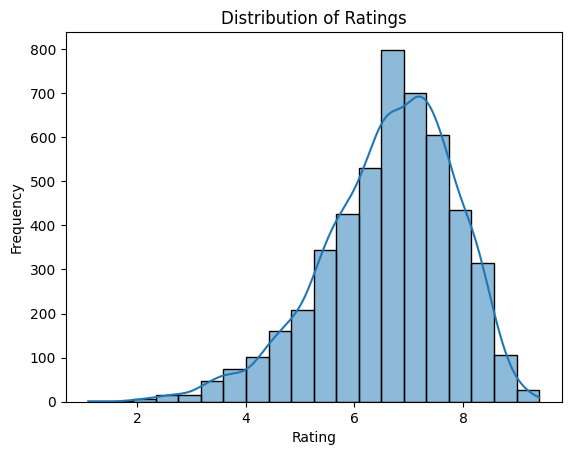

In [61]:
# Distribution of ratings
sns.histplot(data=df, x='RATING', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


14. What is the trend of Movie ratings overs the years?

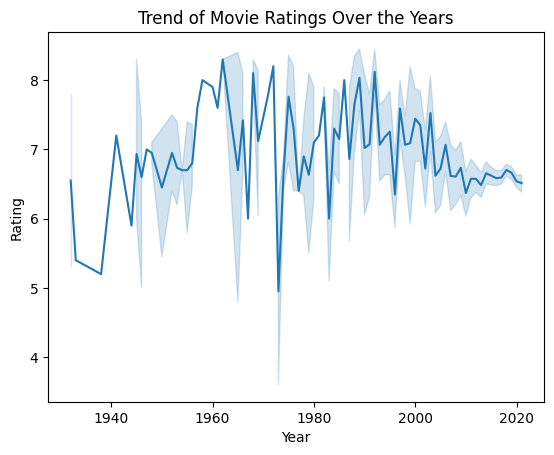

In [62]:
sns.lineplot(data=df, x='YEAR', y='RATING')
plt.title('Trend of Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

15. How does the number of votes vary over the years?

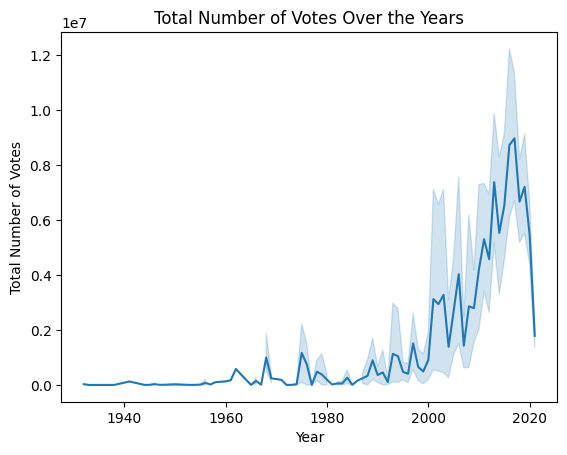

In [63]:

sns.lineplot(data=df, x='YEAR', y='VOTES', estimator='sum')
plt.title('Total Number of Votes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.show()


16. what is the distribution of ratings over the years?

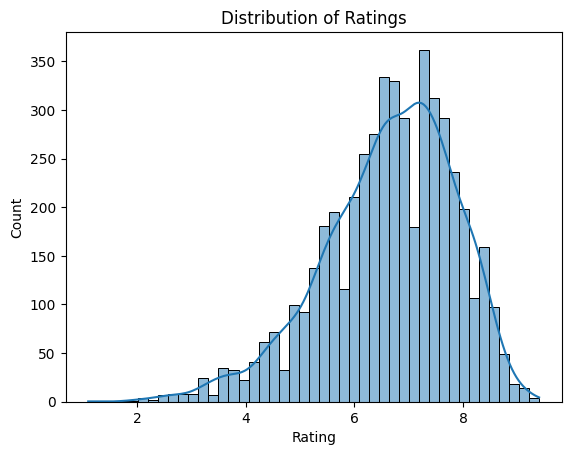

In [64]:
sns.histplot(df['RATING'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()